# Плотное векторное представление слов для определения тональности текста отзывов на фильмы из IMDb (Internet Movie Database) 

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
# работа с обратной связью от обучающейся нейронной сети
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dl-urfu-imdb/train.npy
/kaggle/input/dl-urfu-imdb/train_label.npy
/kaggle/input/dl-urfu-imdb/sample_supmission.csv
/kaggle/input/dl-urfu-imdb/test.npy


Загружаем данные

In [13]:
KAGGLE_PATH = '/kaggle/input/dl-urfu-imdb/'
x_train = np.load(KAGGLE_PATH + 'train.npy', allow_pickle=True)
y_train = np.load(KAGGLE_PATH + 'train_label.npy', allow_pickle=True)
x_test = np.load(KAGGLE_PATH + 'test.npy', allow_pickle=True)
x_train.shape, y_train.shape, x_test.shape, 

((46000,), (46000,), (4000,))

## Подготовка данных для обучения

In [14]:
max_words = 10_000
maxlen = 250
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

## Создание нейронной сети

In [15]:
model = Sequential()
model.add(Embedding(max_words, 7, input_length=maxlen))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [17]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=20,
                    batch_size=200,
                    validation_split=0.1)

Epoch 1/20
207/207 [==============================] - 2s 8ms/step - loss: 0.6930 - accuracy: 0.5064 - val_loss: 0.6711 - val_accuracy: 0.6643
Epoch 2/20
207/207 [==============================] - 1s 7ms/step - loss: 0.6267 - accuracy: 0.6974 - val_loss: 0.4507 - val_accuracy: 0.8341
Epoch 3/20
207/207 [==============================] - 1s 7ms/step - loss: 0.4332 - accuracy: 0.8199 - val_loss: 0.3390 - val_accuracy: 0.8791
Epoch 4/20
207/207 [==============================] - 1s 7ms/step - loss: 0.3521 - accuracy: 0.8565 - val_loss: 0.2989 - val_accuracy: 0.8898
Epoch 5/20
207/207 [==============================] - 1s 7ms/step - loss: 0.3192 - accuracy: 0.8684 - val_loss: 0.2807 - val_accuracy: 0.8933
Epoch 6/20
207/207 [==============================] - 1s 7ms/step - loss: 0.2954 - accuracy: 0.8773 - val_loss: 0.2678 - val_accuracy: 0.8970
Epoch 7/20
207/207 [==============================] - 1s 7ms/step - loss: 0.2825 - accuracy: 0.8846 - val_loss: 0.2606 - val_accuracy: 0.8991
Epoch 

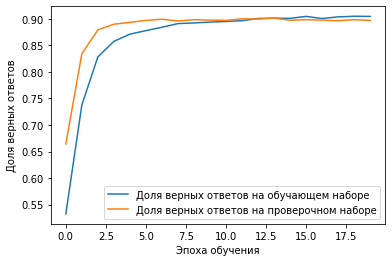

In [18]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Готовим данные для LeaderBoard

In [19]:
sample_submission = pd.read_csv(KAGGLE_PATH + 'sample_supmission.csv', index_col='id')
sample_submission.label = model.predict_classes(x_test)
sample_submission.to_csv("sample_submission.csv")